In [1]:
# Import libraries
import numpy
import matplotlib
import pandas as pd

# **STEP 1: EXPLORATORY DATA ANALYSIS (EDA)**

In [2]:

# Import Airline Reviews csv dataset as a dataframe
airline_reviews = pd.read_csv('/content/Airline_review.csv') # Remember to change path accordingly
airline_reviews.drop('Unnamed: 0', axis=1, inplace=True)

print('airline_reviews shape:')
display(airline_reviews.shape)

print('airline_reviews head:')
display(airline_reviews.head())

print('airline_reviews unique value count:')
display(airline_reviews.nunique())

print('airline_reviews null value count:')
display(airline_reviews.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews.dtypes)

print(f"Class Distribution: {airline_reviews['Recommended'].value_counts()}")

airline_reviews shape:


(23171, 19)

airline_reviews head:


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


airline_reviews unique value count:


,0
Airline Name,497
Overall_Rating,10
Review_Title,17219
Review Date,4557
Verified,2
Review,23046
Aircraft,1048
Type Of Traveller,4
Seat Type,4
Route,13607


airline_reviews null value count:


,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Verified,0
Review,0
Aircraft,16042
Type Of Traveller,3738
Seat Type,1096
Route,3828


airline_reviews rows w/ null value count:


,0
0,True
1,True
2,True
3,True
4,True
...,...
23166,True
23167,True
23168,True
23169,False


airline_reviews data types:


,0
Airline Name,object
Overall_Rating,object
Review_Title,object
Review Date,object
Verified,bool
Review,object
Aircraft,object
Type Of Traveller,object
Seat Type,object
Route,object


Class Distribution: Recommended
no     15364
yes     7807
Name: count, dtype: int64


**Key Columns Descriptions:**
*   Airline Name: Name of the airline.
*   Overall_Rating: General rating given to the airline.
*   Review_Title: Title of the review.
*   Review Date: Date the review was posted.
*   Verified: Whether the review is verified.
*   Review: Text of the review.
*   Aircraft: Aircraft type (sparse data).
*   Type Of Traveller: E.g., solo leisure, business.
*   Seat Type: Cabin type (e.g., Economy, Business).
*   Route: Flight route (origin-destination pair).
*   Date Flown: When the flight occurred.
*   Ratings (various aspects, on a scale of 1.0 - 5.0):
  *   Seat Comfort
  *   Cabin Staff Service
  *   Food & Beverages
  *   Ground Service
  *   Inflight Entertainment
  *   Wifi & Connectivity
  *   Value For Money
*   Recommended: Whether the reviewer recommends the airline.


In [13]:
print(airline_reviews['Seat Type'].unique())

['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


Below is code to visualize the distribution of numerical ratings (e.g., Seat Comfort, Cabin Staff Service, Food & Beverages, etc.) using histograms and boxplots.

The histograms provide an overview of the frequency distribution of each numerical column, showing how ratings are spread.
The boxplots highlight outliers and compare median ratings.

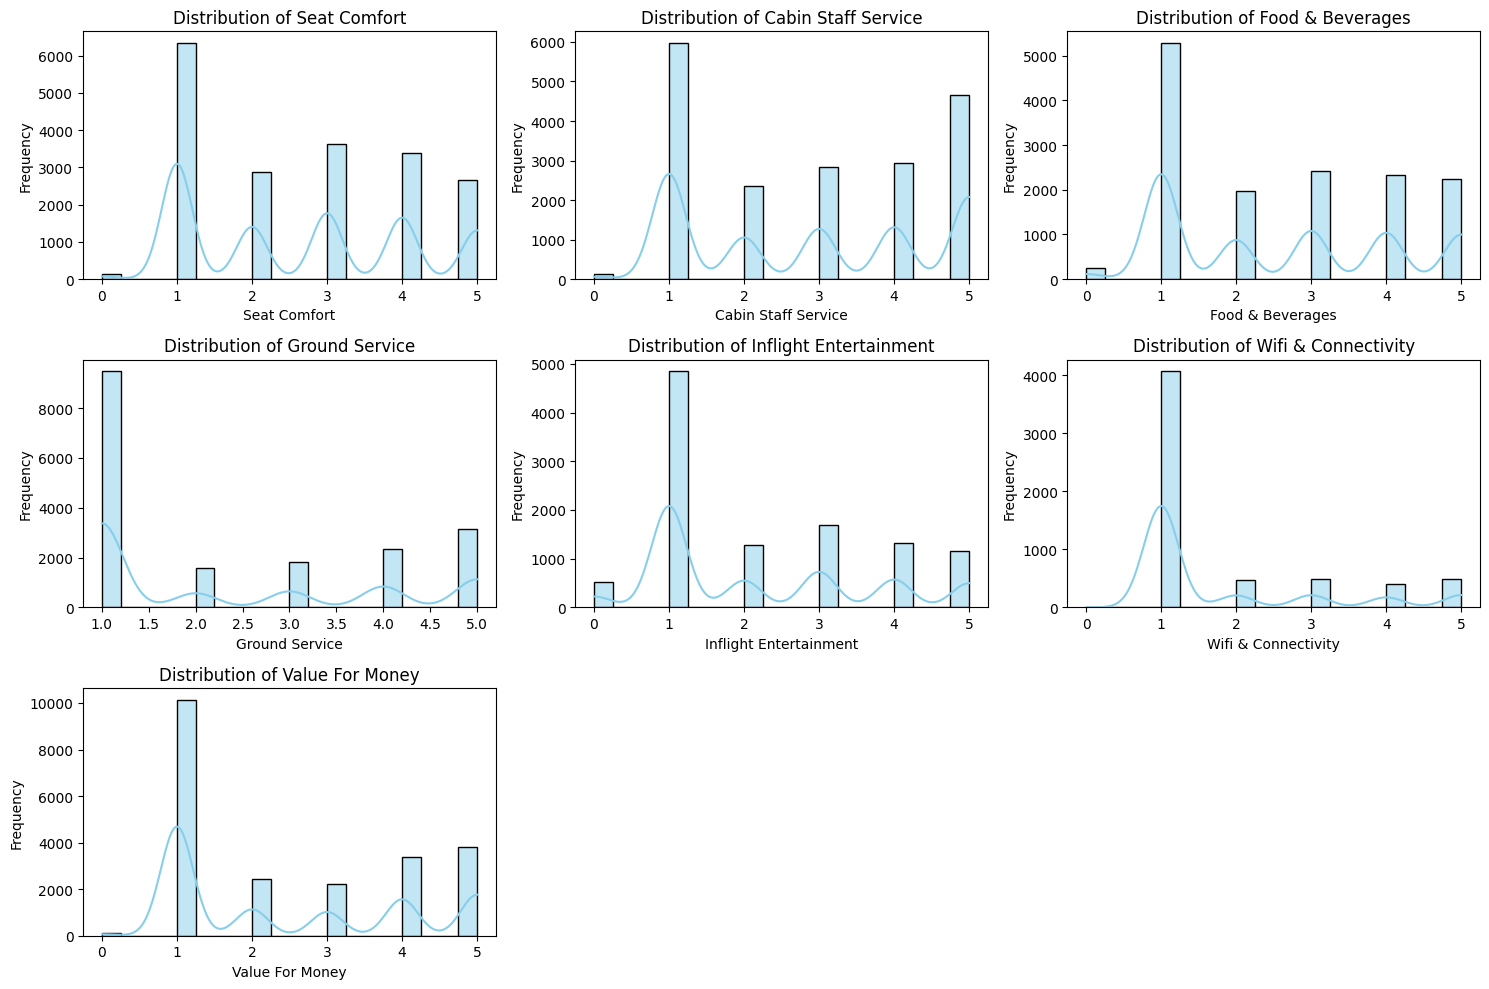

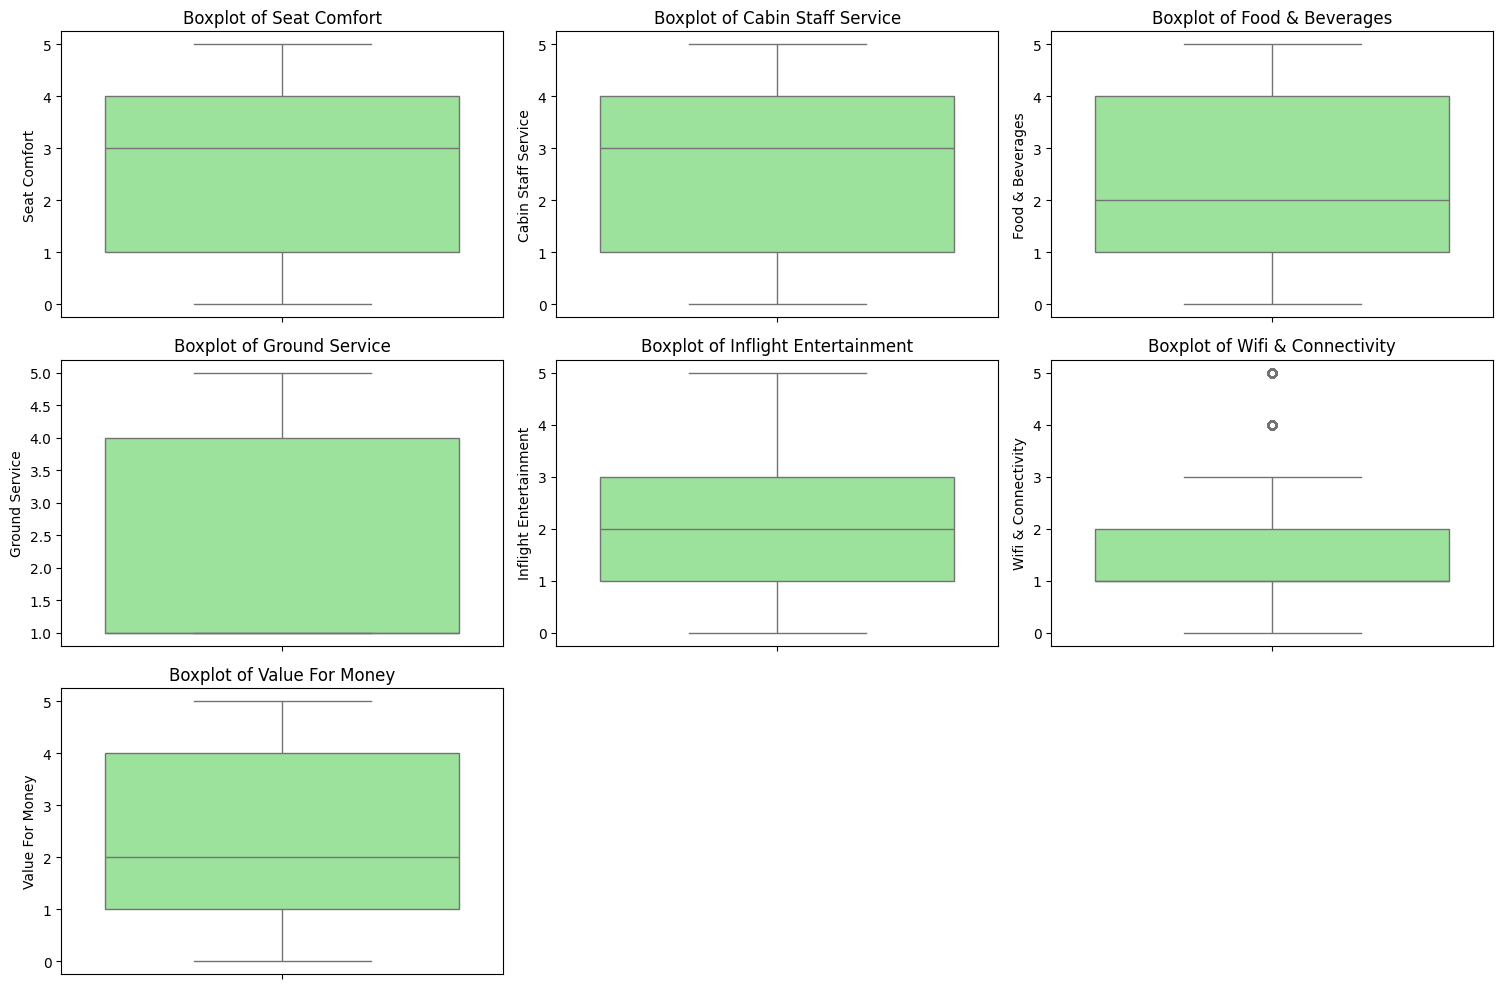

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical rating columns
numerical_columns = [
    "Seat Comfort", "Cabin Staff Service", "Food & Beverages",
    "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"
]

# Set up the figure for histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)  # Create a grid of subplots
    sns.histplot(airline_reviews[column].dropna(), bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Set up the figure for boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)  # Create a grid of subplots
    sns.boxplot(data=airline_reviews, y=column, color="lightgreen")
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()


Below is code to visualize the relationship between numerical ratings (e.g., Seat Comfort, Cabin Staff Service, etc.) and the Recommended column using boxplots.

**Boxplots:**
The Recommended column is on the x-axis, and each rating column (e.g., Seat Comfort) is on the y-axis.
The plot shows the spread of ratings for Recommended (yes/no).

<ipython-input-5-41c37cfa0c65>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=airline_reviews, x="Recommended", y=column, palette="Set2")
<ipython-input-5-41c37cfa0c65>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=airline_reviews, x="Recommended", y=column, palette="Set2")
<ipython-input-5-41c37cfa0c65>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=airline_reviews, x="Recommended", y=column, palette="Set2")
<ipython-input-5-41c37cfa0c65>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

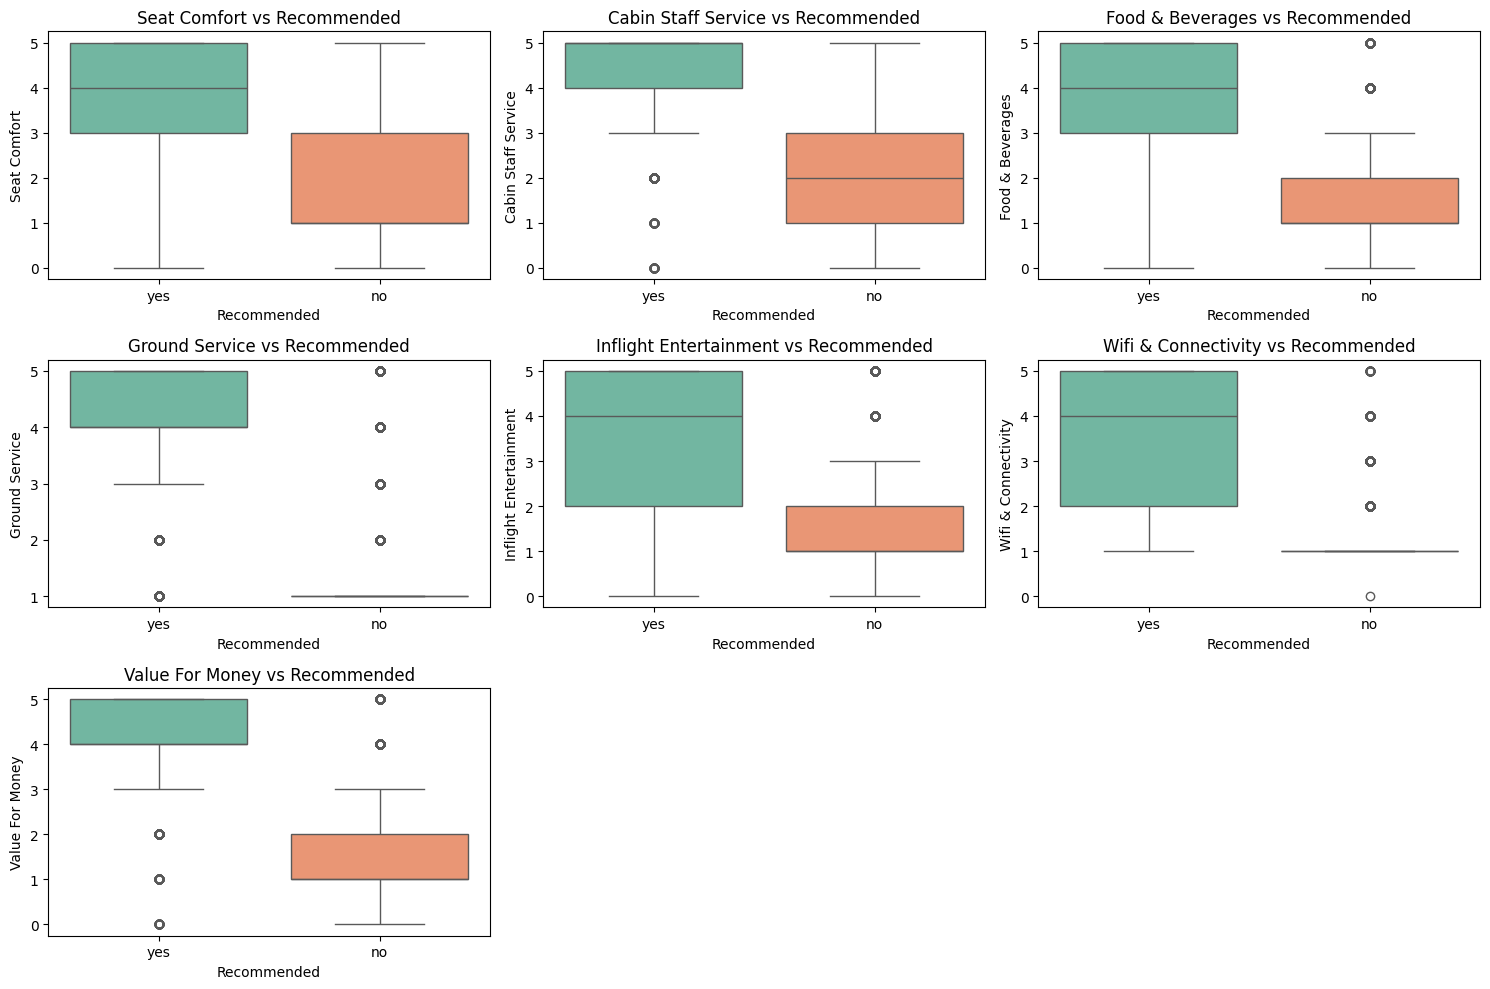

In [5]:
# Convert the "Recommended" column to a consistent categorical format (e.g., lowercase or yes/no)
airline_reviews["Recommended"] = airline_reviews["Recommended"].str.lower()

# List of numerical rating columns
numerical_columns = [
    "Seat Comfort", "Cabin Staff Service", "Food & Beverages",
    "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"
]

# Set up the figure for boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)  # Create a grid of subplots
    sns.boxplot(data=airline_reviews, x="Recommended", y=column, palette="Set2")
    plt.title(f"{column} vs Recommended")
    plt.xlabel("Recommended")
    plt.ylabel(column)
plt.tight_layout()
plt.show()


# **STEP 2: DATA CLEANING & PRE-PROCESSING**

In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews.drop('Airline Name', axis=1, inplace=True)
airline_reviews.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews.drop('Review_Title', axis=1, inplace=True)
airline_reviews.drop('Review Date', axis=1, inplace=True)
airline_reviews.drop('Review', axis=1, inplace=True)
airline_reviews.drop('Aircraft', axis=1, inplace=True)
airline_reviews.drop('Route', axis=1, inplace=True)
airline_reviews.drop('Date Flown', axis=1, inplace=True)

In [ ]:
"""
2. Transform null values if applicable
Many reviews will have null values in rating columns where the reviewer may
have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

If there is a null rating, just set it to "3.0")
"""

airline_reviews['Seat Comfort'].fillna(3.0, inplace=True)
airline_reviews['Cabin Staff Service'].fillna(3.0, inplace=True)
airline_reviews['Food & Beverages'].fillna(3.0, inplace=True)
airline_reviews['Ground Service'].fillna(3.0, inplace=True)
airline_reviews['Inflight Entertainment'].fillna(3.0, inplace=True)
airline_reviews['Wifi & Connectivity'].fillna(3.0, inplace=True)

In [ ]:
"""
3. Drop all rows with null values
"""

airline_reviews.dropna(inplace=True)
airline_reviews.reset_index(inplace=True)

# print(airline_reviews.isnull().sum())

In [ ]:
"""
4. Drop all reviews that are not Verified
"""

airline_reviews = airline_reviews[airline_reviews['Verified'] == True]
airline_reviews.drop('Verified', axis=1, inplace=True) # Drop the column after subsetting


In [ ]:
"""
5. Standardize numeric scales.

From the dataset, the columns to standardize include:

Seat Comfort
Cabin Staff Service
Food & Beverages
Ground Service
Inflight Entertainment
Wifi & Connectivity
Value For Money

"""

from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_columns = [
    'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity',
    'Value For Money'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
airline_reviews[numeric_columns] = scaler.fit_transform(airline_reviews[numeric_columns])

# Verify the results
print("Summary statistics after scaling:")
print(airline_reviews[numeric_columns].describe())

In [ ]:
"""
6. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews['Recommended'] = airline_reviews['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Evaluating post-processed dataset.
"""
airline_reviews.drop('index', axis=1, inplace=True)
airline_reviews.reset_index()

print('airline_reviews shape:')
display(airline_reviews.shape)

print('airline_reviews head:')
display(airline_reviews.head())

print('airline_reviews unique value count:')
display(airline_reviews.nunique())

print('airline_reviews null value count:')
display(airline_reviews.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews.dtypes)

print(f"Class Distribution: {airline_reviews['Recommended'].value_counts()}")

# **STEP 3: TRAIN THE RANDOM FOREST MODEL W/O RESAMPLNG (BENCHMARK MODEL)**

**Why Random Forest is a Good Option**

**Handles Non-Linearity:**
Random Forest captures complex, non-linear relationships between features and the target variable, making it ideal for our dataset with varied customer experience metrics.

**Robust to Overfitting:**
The ensemble approach of Random Forest reduces overfitting, offering strong generalization, especially with noisy data like customer reviews.

**Works with Imbalanced Data:**
Random Forest can manage class imbalance effectively, paired with resampling methods like SMOTE, ensuring better performance for the minority class.

**Feature Importance:**
Random Forest provides built-in feature importance, helping us identify which customer experience factors most influence recommendations.

**No Need for Feature Scaling:**
Since Random Forests use decision trees, they don’t require scaling, saving time in preprocessing.

**Handles Mixed Data Types:**
Random Forest works well with both categorical and numerical features, which is useful for our dataset.